In [4]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/dejavu/

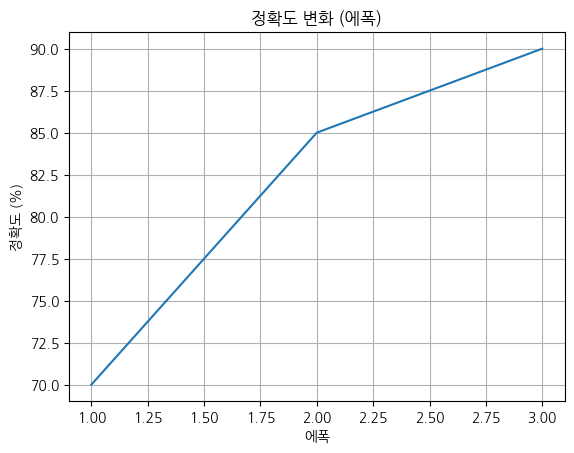

In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ÎÇòÎàîÍ≥†Îîï Í≤ΩÎ°ú (ÏòàÏãú: NanumGothic)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# Ìè∞Ìä∏ Îì±Î°ù
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ

# ÌÖåÏä§Ìä∏
plt.plot([1, 2, 3], [70, 85, 90])
plt.title("Ï†ïÌôïÎèÑ Î≥ÄÌôî (ÏóêÌè≠)")
plt.xlabel("ÏóêÌè≠")
plt.ylabel("Ï†ïÌôïÎèÑ (%)")
plt.grid(True)
plt.show()


In [6]:
import matplotlib.font_manager as fm
for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    if 'Nanum' in font or 'Malgun' in font or 'Gothic' in font:
        print(font)


/usr/share/fonts/truetype/nanum/NanumSquareB.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf
/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
/usr/share/fonts/truetype/nanum/NanumSquareR.ttf
/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
/usr/share/fonts/truetype/nanum/NanumGothic.ttf
/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf


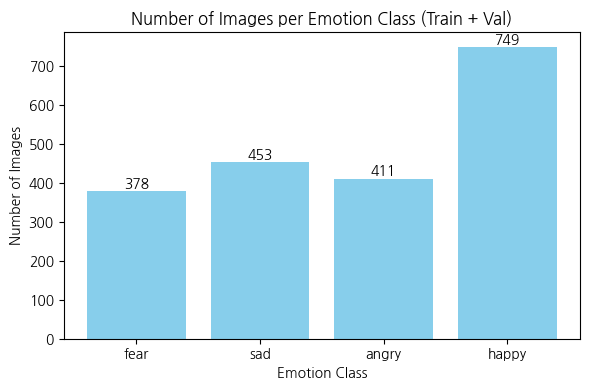

In [7]:
import os
import matplotlib.pyplot as plt

# Ï†ÑÏ≤¥ Ïù¥ÎØ∏ÏßÄ Ïàò Ïπ¥Ïö¥ÌåÖ Ìï®Ïàò (train + val)
def count_images_by_class(base_dir):
    class_counts = {}
    for subset in ['train', 'val']:
        subset_path = os.path.join(base_dir, subset)
        if not os.path.exists(subset_path):
            continue
        for cls in os.listdir(subset_path):
            cls_path = os.path.join(subset_path, cls)
            if os.path.isdir(cls_path):
                count = len([
                    f for f in os.listdir(cls_path)
                    if f.lower().endswith(('.png', '.jpg', '.jpeg'))
                ])
                class_counts[cls] = class_counts.get(cls, 0) + count
    return class_counts

# Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú
data_dir = "/workspace/datasets/dataset2yolo/drawing"
counts = count_images_by_class(data_dir)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 4))
bars = plt.bar(counts.keys(), counts.values(), color='skyblue')
plt.title("Number of Images per Emotion Class (Train + Val)")
plt.xlabel("Emotion Class")
plt.ylabel("Number of Images")

# Î∞î ÏúÑÏóê Ïà´Ïûê ÌëúÏãú
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1, f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig("emotion_class_distribution_total_en.png", dpi=300)  # PPTÏö© Ï†ÄÏû•
plt.show()


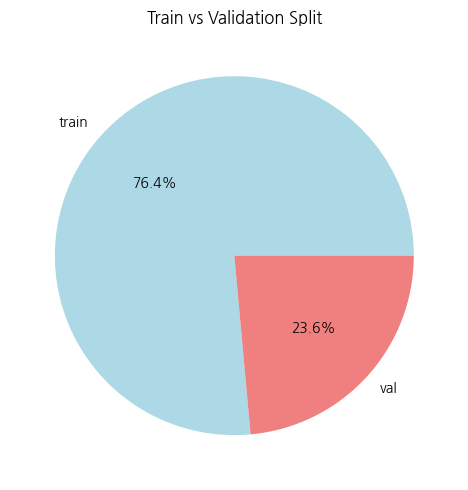

In [8]:
def count_by_split(base_dir):
    counts = {'train': 0, 'val': 0}
    for split in ['train', 'val']:
        split_path = os.path.join(base_dir, split)
        for cls in os.listdir(split_path):
            cls_path = os.path.join(split_path, cls)
            if os.path.isdir(cls_path):
                counts[split] += len([
                    f for f in os.listdir(cls_path)
                    if f.lower().endswith(('.png', '.jpg', '.jpeg'))
                ])
    return counts

data_dir = "/workspace/datasets/dataset2yolo/drawing"
split_counts = count_by_split(data_dir)

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(split_counts.values(), labels=split_counts.keys(), autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title("Train vs Validation Split")
plt.tight_layout()
plt.savefig("train_val_split.png", dpi=300)
plt.show()


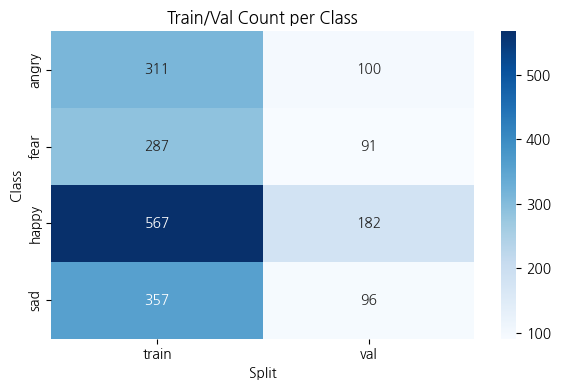

In [9]:
import seaborn as sns
import pandas as pd

def count_class_split(base_dir):
    result = []
    for split in ['train', 'val']:
        split_path = os.path.join(base_dir, split)
        for cls in os.listdir(split_path):
            cls_path = os.path.join(split_path, cls)
            if os.path.isdir(cls_path):
                count = len([
                    f for f in os.listdir(cls_path)
                    if f.lower().endswith(('.png', '.jpg', '.jpeg'))
                ])
                result.append({'Class': cls, 'Split': split, 'Count': count})
    return pd.DataFrame(result)

df = count_class_split(data_dir)
pivot = df.pivot(index='Class', columns='Split', values='Count').fillna(0)

plt.figure(figsize=(6, 4))
sns.heatmap(pivot, annot=True, fmt='g', cmap='Blues')
plt.title("Train/Val Count per Class")
plt.tight_layout()
plt.savefig("class_split_heatmap.png", dpi=300)
plt.show()


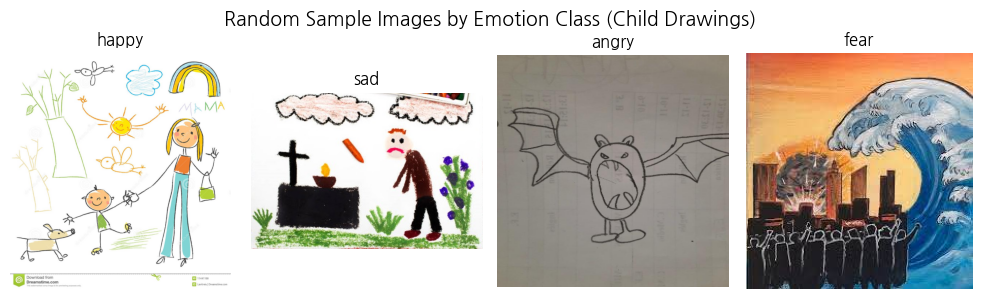

In [10]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Í∞êÏ†ï ÌÅ¥ÎûòÏä§ Î™©Î°ù
classes = ["happy", "sad", "angry", "fear"]
base_dir = "/workspace/datasets/dataset2yolo/drawing"

plt.figure(figsize=(10, 3))

for i, cls in enumerate(classes):
    found = False
    for split in ['train', 'val']:
        cls_dir = os.path.join(base_dir, split, cls)
        if os.path.isdir(cls_dir):
            img_files = [f for f in os.listdir(cls_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            if img_files:
                img_path = os.path.join(cls_dir, random.choice(img_files))  # ‚úÖ ÎûúÎç§ ÏÑ†ÌÉù
                img = Image.open(img_path)

                plt.subplot(1, 4, i + 1)
                plt.imshow(img)
                plt.title(cls)
                plt.axis('off')
                found = True
                break
    if not found:
        print(f"‚ùå No image found for class: {cls}")

plt.suptitle("Random Sample Images by Emotion Class (Child Drawings)", fontsize=14)
plt.tight_layout()
plt.savefig("sample_emotion_images_random.png", dpi=300)
plt.show()


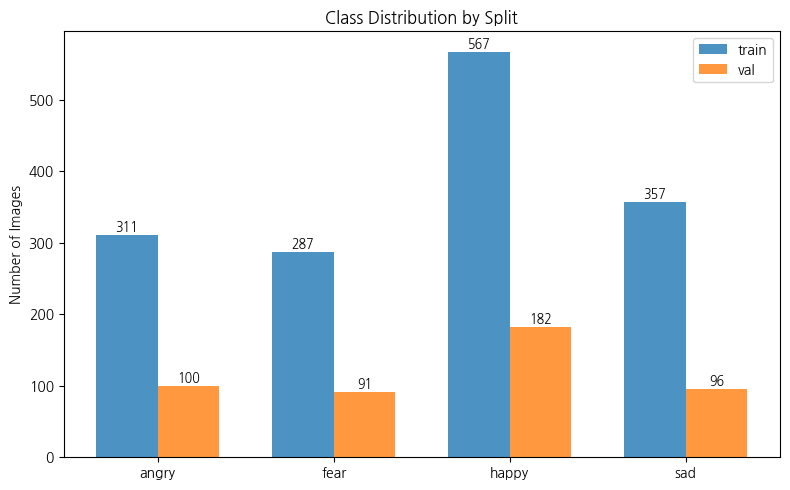

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Í≤ΩÎ°ú ÏÑ§Ï†ï
base_dir = "/workspace/datasets/dataset2yolo/drawing"
splits = ["train", "val"]
classes = ["angry", "fear", "happy", "sad"]

# Ïù¥ÎØ∏ÏßÄ Ïàò Ïπ¥Ïö¥Ìä∏
data = []
for split in splits:
    for cls in classes:
        cls_path = os.path.join(base_dir, split, cls)
        num_images = len([
            f for f in os.listdir(cls_path)
            if f.lower().endswith(('.jpg', '.png', '.jpeg'))
        ])
        data.append({"split": split, "class": cls, "count": num_images})

df = pd.DataFrame(data)

# ‚ñ∂Ô∏è ÌÅ¥ÎûòÏä§Î≥Ñ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî + Ïà´Ïûê ÌëúÏãú
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.35
x = range(len(classes))

for i, split in enumerate(splits):
    sub_df = df[df["split"] == split]
    counts = sub_df["count"].values
    bars = ax.bar(
        [p + i * bar_width for p in x], counts,
        bar_width, label=split, alpha=0.8
    )

    # ‚úÖ Í∞Å Î∞î ÏúÑÏóê Ïà´Ïûê ÌëúÏãú
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 1,
            f"{int(height)}",
            ha='center', va='bottom', fontsize=9
        )

# xÏ∂ï ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ ÏÑ∏ÌåÖ
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(classes)

ax.set_title("Class Distribution by Split")
ax.set_ylabel("Number of Images")
ax.legend()
plt.tight_layout()
plt.show()


/tmp/ipykernel_103904/2007118630.py:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  plt.tight_layout()
/workspace/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


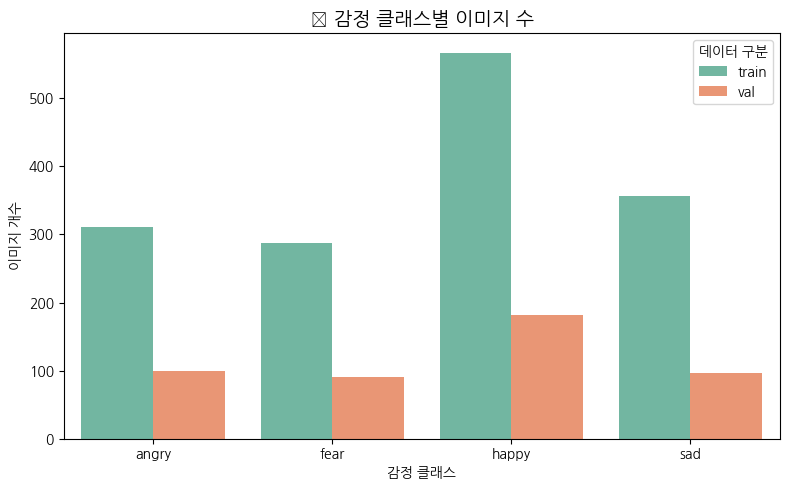

In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# ÏúÑÏóêÏÑú ÎßåÎì† df Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="class", y="count", hue="split", palette="Set2")
plt.title("üìä Í∞êÏ†ï ÌÅ¥ÎûòÏä§Î≥Ñ Ïù¥ÎØ∏ÏßÄ Ïàò", fontsize=14)
plt.xlabel("Í∞êÏ†ï ÌÅ¥ÎûòÏä§")
plt.ylabel("Ïù¥ÎØ∏ÏßÄ Í∞úÏàò")
plt.legend(title="Îç∞Ïù¥ÌÑ∞ Íµ¨Î∂Ñ")
plt.tight_layout()
plt.show()


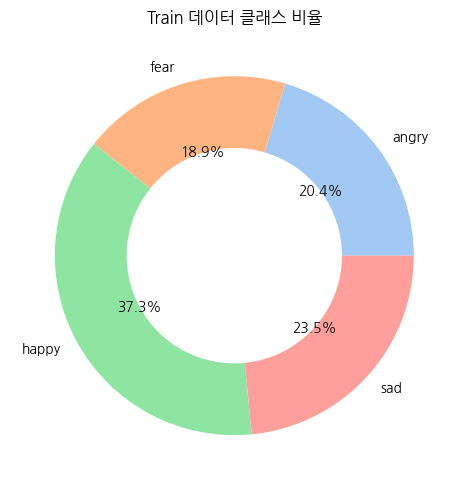

In [16]:
# ÎπÑÏú® Ï§ëÏã¨ ÎèÑÎÑõÏ∞®Ìä∏ (train Í∏∞Ï§Ä)
train_df = df[df["split"] == "train"]
colors = sns.color_palette("pastel")[0:4]

plt.figure(figsize=(5, 5))
plt.pie(train_df["count"], labels=train_df["class"], colors=colors,
        autopct='%1.1f%%', wedgeprops={'width':0.4})
plt.title("Train Îç∞Ïù¥ÌÑ∞ ÌÅ¥ÎûòÏä§ ÎπÑÏú®")
plt.tight_layout()
plt.show()


/tmp/ipykernel_103904/488788991.py:34: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  plt.tight_layout()
/tmp/ipykernel_103904/488788991.py:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  plt.savefig("class_distribution_bar.png")  # Ï†ÄÏû•ÎèÑ Í∞ÄÎä•
/workspace/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


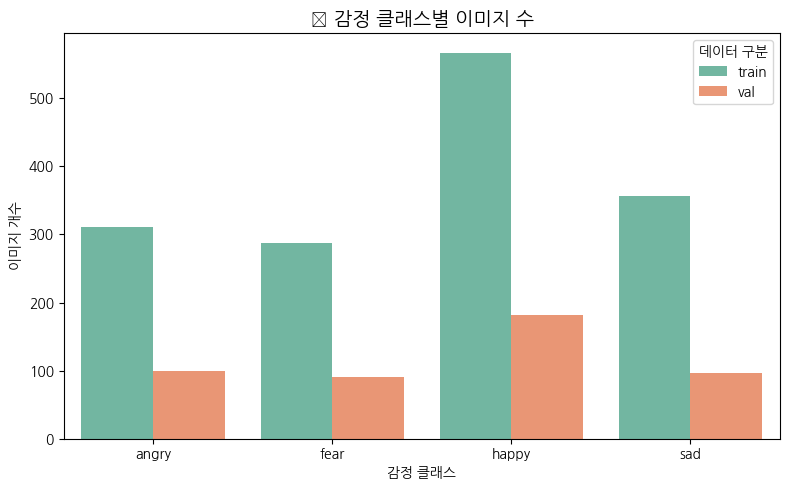

/tmp/ipykernel_103904/488788991.py:45: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) NanumGothic.
  plt.tight_layout()
/tmp/ipykernel_103904/488788991.py:46: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) NanumGothic.
  plt.savefig("train_donut_chart.png")
/workspace/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


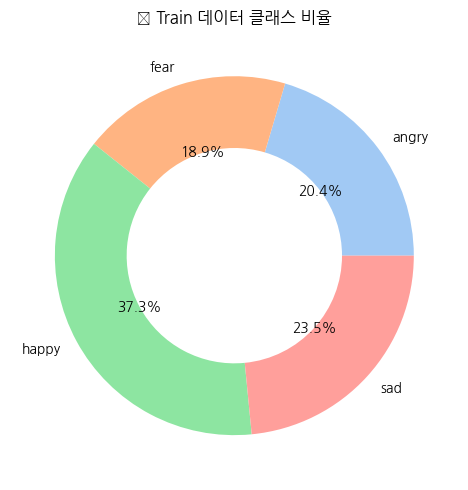


üìå ÌÅ¥ÎûòÏä§Î≥Ñ ÏòàÏãú Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú:
   class                                         image_path
0  angry  /workspace/datasets/dataset2yolo/drawing/train...
1   fear  /workspace/datasets/dataset2yolo/drawing/train...
2  happy  /workspace/datasets/dataset2yolo/drawing/train...
3    sad  /workspace/datasets/dataset2yolo/drawing/train...


In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ‚úÖ [1] Í≤ΩÎ°ú ÏÑ§Ï†ï (üí° ÏïÑÎûò Í≤ΩÎ°úÎ•º Î≥∏Ïù∏ ÏãúÏä§ÌÖúÏóê ÎßûÍ≤å ÏàòÏ†ïÌïòÏÑ∏Ïöî)
base_dir = "/workspace/datasets/dataset2yolo/drawing"  # ÎòêÎäî "./dataset2yolo/drawing"
splits = ["train", "val"]
classes = ["angry", "fear", "happy", "sad"]

# ‚úÖ [2] ÌÅ¥ÎûòÏä§Î≥Ñ Ïù¥ÎØ∏ÏßÄ Í∞úÏàò ÏàòÏßë
data = []
for split in splits:
    for cls in classes:
        cls_path = os.path.join(base_dir, split, cls)
        if not os.path.exists(cls_path):
            print(f"‚ùå Í≤ΩÎ°úÍ∞Ä Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§: {cls_path}")
            continue
        num_images = len([
            f for f in os.listdir(cls_path)
            if f.lower().endswith(('.jpg', '.jpeg', '.png'))
        ])
        data.append({"split": split, "class": cls, "count": num_images})

df = pd.DataFrame(data)

# ‚úÖ [3] ÏãúÍ∞ÅÌôî 1: ÌÅ¥ÎûòÏä§Î≥Ñ Ïù¥ÎØ∏ÏßÄ Í∞úÏàò (Bar Chart)
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="class", y="count", hue="split", palette="Set2")
plt.title("üìä Í∞êÏ†ï ÌÅ¥ÎûòÏä§Î≥Ñ Ïù¥ÎØ∏ÏßÄ Ïàò", fontsize=14)
plt.xlabel("Í∞êÏ†ï ÌÅ¥ÎûòÏä§")
plt.ylabel("Ïù¥ÎØ∏ÏßÄ Í∞úÏàò")
plt.legend(title="Îç∞Ïù¥ÌÑ∞ Íµ¨Î∂Ñ")
plt.tight_layout()
plt.savefig("class_distribution_bar.png")  # Ï†ÄÏû•ÎèÑ Í∞ÄÎä•
plt.show()

# ‚úÖ [4] ÏãúÍ∞ÅÌôî 2: Train Îç∞Ïù¥ÌÑ∞ ÎπÑÏú® (Donut Chart)
train_df = df[df["split"] == "train"]
colors = sns.color_palette("pastel")[0:4]
plt.figure(figsize=(5, 5))
plt.pie(train_df["count"], labels=train_df["class"], colors=colors,
        autopct='%1.1f%%', wedgeprops={'width': 0.4})
plt.title("üéØ Train Îç∞Ïù¥ÌÑ∞ ÌÅ¥ÎûòÏä§ ÎπÑÏú®")
plt.tight_layout()
plt.savefig("train_donut_chart.png")
plt.show()

# ‚úÖ [5] ÌÅ¥ÎûòÏä§Î≥Ñ ÏòàÏãú Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú ÏàòÏßë
example_images = []
for cls in classes:
    cls_path = os.path.join(base_dir, "train", cls)
    image_files = [
        f for f in os.listdir(cls_path)
        if f.lower().endswith(('.jpg', '.png', '.jpeg'))
    ]
    if image_files:
        example_images.append({
            "class": cls,
            "image_path": os.path.join(cls_path, image_files[0])
        })

examples_df = pd.DataFrame(example_images)
print("\nüìå ÌÅ¥ÎûòÏä§Î≥Ñ ÏòàÏãú Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú:")
print(examples_df)
